In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
bitcoin = pd.read_csv('BTC-USD.csv', index_col='Date', parse_dates= True)

In [3]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


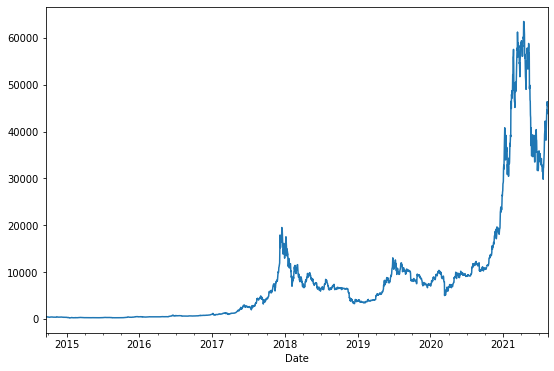

In [4]:
bitcoin['Close'].plot(figsize=(9,6))

In [5]:
bitcoin.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2021-08-03', '2021-08-04', '2021-08-05', '2021-08-06',
               '2021-08-07', '2021-08-08', '2021-08-09', '2021-08-10',
               '2021-08-11', '2021-08-12'],
              dtype='datetime64[ns]', name='Date', length=2522, freq=None)

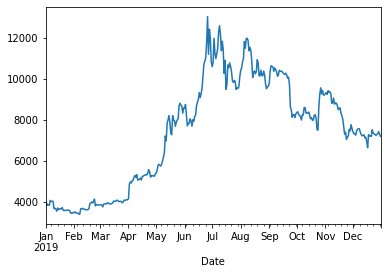

In [6]:
bitcoin['2019']['Close'].plot()

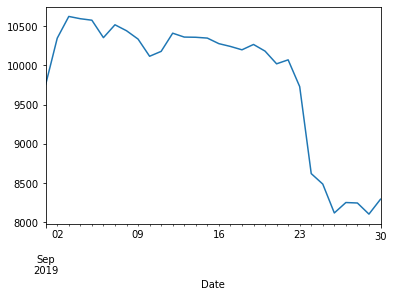

In [7]:
bitcoin['2019-09']['Close'].plot()

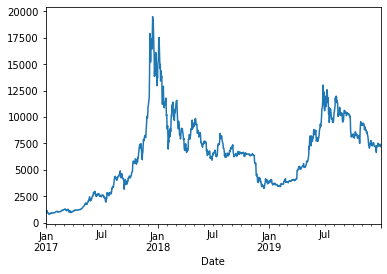

In [8]:
#bitcoin['2017':'2019']['Close'].plot()
bitcoin.loc['2017':'2019']['Close'].plot()

# on peut utiliser **"pd.to_datetime('2019/03/20')"**

Date
2019-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-02-28    AxesSubplot(0.125,0.125;0.775x0.755)
2019-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-10-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-11-30    AxesSubplot(0.125,0.125;0.775x0.755)
2019-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: M, Name: Close, dtype: object

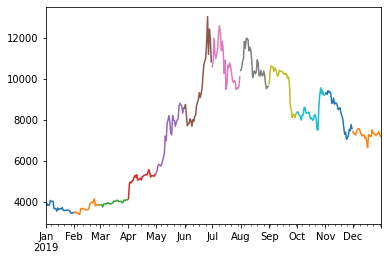

In [9]:
bitcoin.loc['2019']['Close'].resample('M').plot()

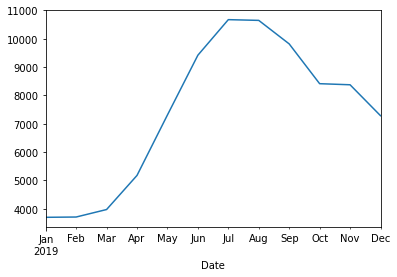

In [10]:
bitcoin.loc['2019']['Close'].resample('M').mean().plot()

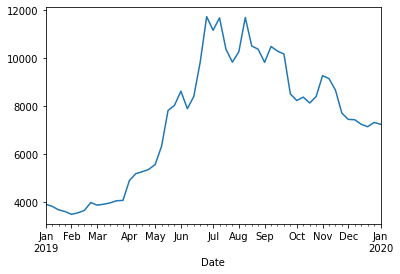

In [11]:
bitcoin.loc['2019']['Close'].resample('W').mean().plot()

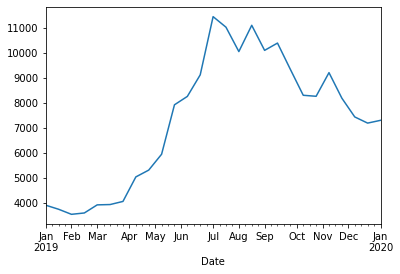

In [12]:
bitcoin.loc['2019']['Close'].resample('2W').mean().plot()

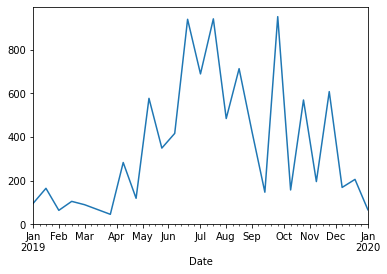

In [13]:
bitcoin.loc['2019']['Close'].resample('2W').std().plot()

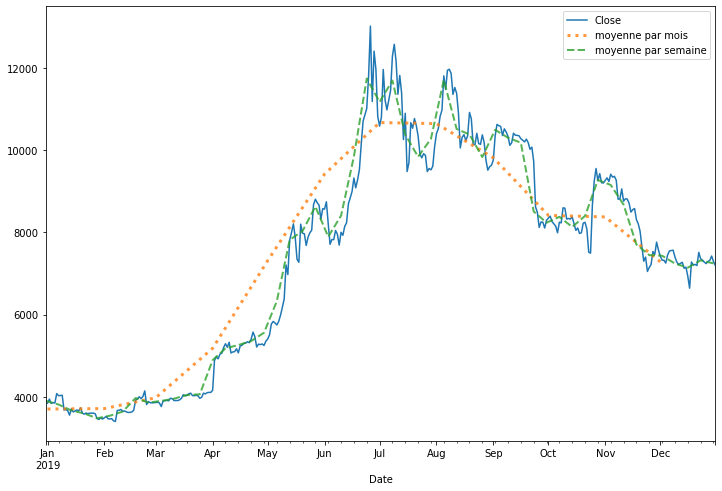

In [14]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019']['Close'].plot()
bitcoin.loc['2019']['Close'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019']['Close'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

In [15]:
bitcoin.loc['2019', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max']).head()

,mean,std,min,max
Date,,,,
2019-01-06,3900.535889,94.936635,3836.741211,4076.632568
2019-01-13,3810.276681,210.660875,3552.953125,4035.296387
2019-01-20,3665.388532,43.460176,3601.013672,3728.568359
2019-01-27,3593.255755,11.271462,3576.032471,3604.577148
2019-02-03,3476.508754,24.353181,3448.116943,3521.060791


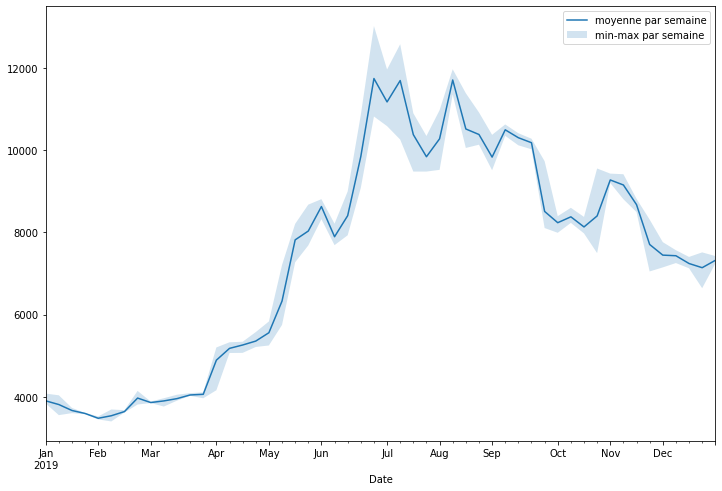

In [16]:
m = bitcoin.loc['2019', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(12, 8))
m['mean']['2019'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')

plt.legend()
plt.show()

In [17]:
bitcoin.loc['2019', 'Close'].rolling(window=7)

Rolling [window=7,center=False,axis=0]

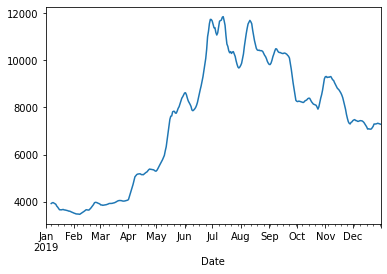

In [18]:
bitcoin.loc['2019', 'Close'].rolling(window=7).mean().plot()

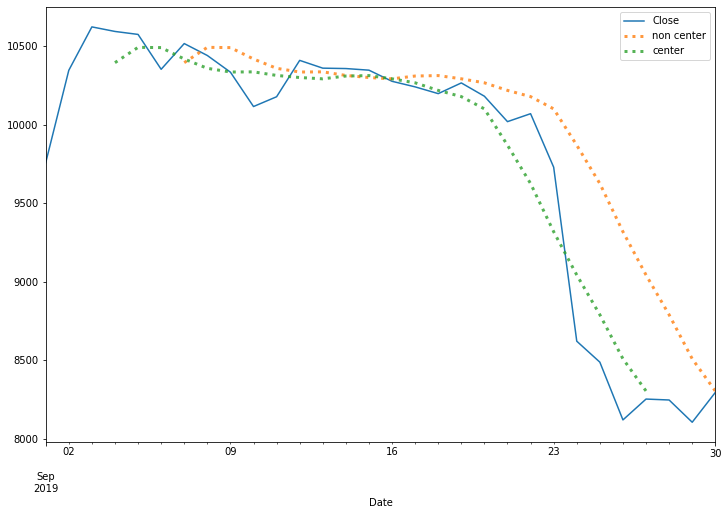

In [19]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09']['Close'].plot()
bitcoin.loc['2019-09']['Close'].rolling(window=7).mean().plot(label='non center', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09']['Close'].rolling(window=7,center=True).mean().plot(label='center', lw=3, ls=':', alpha=0.8)

plt.legend()
plt.show()

# **Exponentielle Weighted Function**

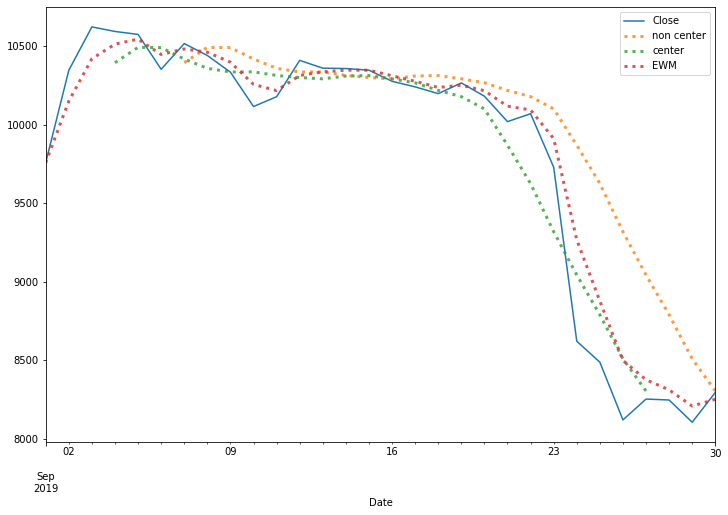

In [20]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09']['Close'].plot()
bitcoin.loc['2019-09']['Close'].rolling(window=7).mean().plot(label='non center', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09']['Close'].rolling(window=7,center=True).mean().plot(label='center', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019-09']['Close'].ewm(alpha=0.5).mean().plot(label='EWM', lw=3, ls=':', alpha=0.8)

plt.legend()
plt.show()

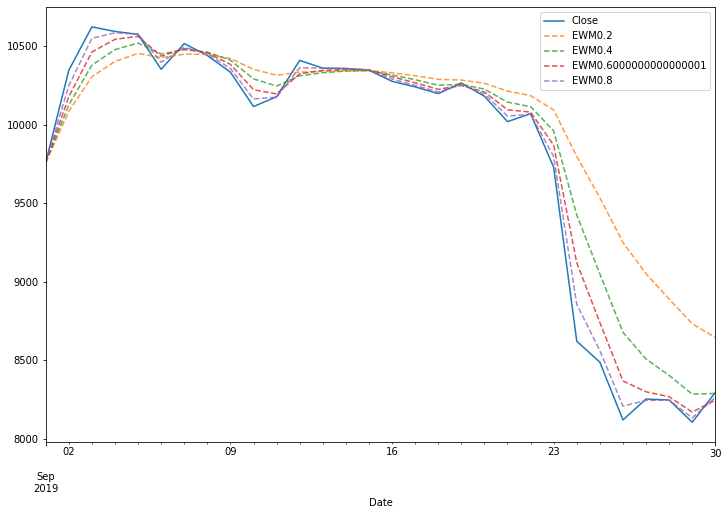

In [21]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09']['Close'].plot()
for i in np.arange(0.2, 1, 0.2):
  bitcoin.loc['2019-09']['Close'].ewm(alpha=i).mean().plot(label=f'EWM{i}', ls='--', alpha=0.8)
plt.legend()
plt.show()

# **Assemblage de plusieurs datasets**

In [22]:
etherium = pd.read_csv('ETH-USD.csv', index_col='Date', parse_dates= True)

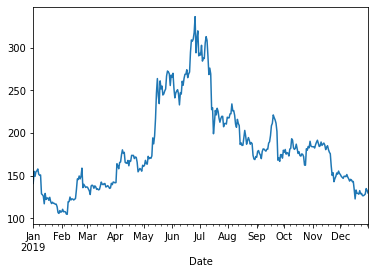

In [23]:
etherium['2019']['Close'].plot()

In [24]:
pd.merge(bitcoin, etherium, on='Date', how='outer', suffixes=('_btc', '_eth')).head()

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
pd.merge(bitcoin, etherium, on='Date', how='inner', suffixes=('_btc', '_eth')).head()

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2015-08-12,270.597992,270.673004,265.468994,266.376007,266.376007,26815400.0,1.05875,1.28994,0.883608,1.21744,1.21744,2150620.0
2015-08-13,266.183014,266.231995,262.841003,264.079987,264.079987,27685500.0,1.22224,1.96507,1.171990,1.82767,1.82767,4068680.0
2015-08-14,264.131989,267.466003,261.477997,265.679993,265.679993,27091200.0,1.81092,2.26188,1.754750,1.82787,1.82787,4637030.0
2015-08-15,265.528992,266.666992,261.295990,261.550995,261.550995,19321100.0,1.80289,1.87724,1.570980,1.68890,1.68890,2554360.0
2015-08-16,261.865997,262.440002,257.040985,258.506989,258.506989,29717000.0,1.68435,1.69524,1.089810,1.56603,1.56603,3550790.0


In [26]:
btc_eth = pd.merge(bitcoin, etherium, on='Date', how='inner', suffixes=('_btc', '_eth'))

In [27]:
btc_eth[['Close_btc', 'Close_eth']]

,Close_btc,Close_eth
Date,,
2015-08-12,266.376007,1.217440
2015-08-13,264.079987,1.827670
2015-08-14,265.679993,1.827870
2015-08-15,261.550995,1.688900
2015-08-16,258.506989,1.566030
...,...,...
2021-08-08,43798.117188,3013.732666
2021-08-09,46365.402344,3167.856201
2021-08-10,45585.031250,3141.691162


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5470630d0>,
      dtype=object)

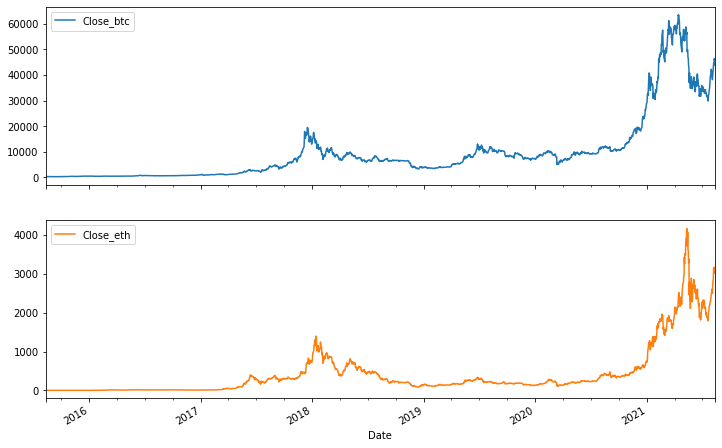

In [28]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12, 8))

In [29]:
correlations = btc_eth[['Close_btc', 'Close_eth']].corr()
correlations

,Close_btc,Close_eth
Close_btc,1.000000,0.907674
Close_eth,0.907674,1.000000


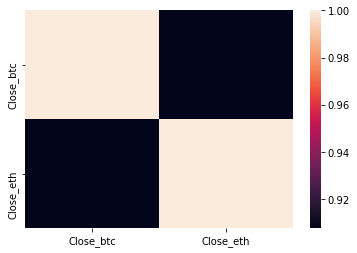

In [30]:
import seaborn as sns
sns.heatmap(correlations)

# **Exercice:**

# **Trading Strategy** 

In [31]:
bitcoin.loc['2019']['Close'].rolling(window=3).min()

Date
2019-01-01            NaN
2019-01-02            NaN
2019-01-03    3836.741211
2019-01-04    3836.741211
2019-01-05    3836.741211
                 ...     
2019-12-27    7238.966797
2019-12-28    7238.966797
2019-12-29    7290.088379
2019-12-30    7292.995117
2019-12-31    7193.599121
Name: Close, Length: 365, dtype: float64

# **Correction**

In [33]:
#%matplotlib

In [34]:
data = bitcoin.copy()
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [35]:
data['RollingMax'] = data['Close'].shift(1).rolling(window=28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window=28).min()
data.loc[data['RollingMax'] < data['Close'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Close'], 'Sell'] = -1

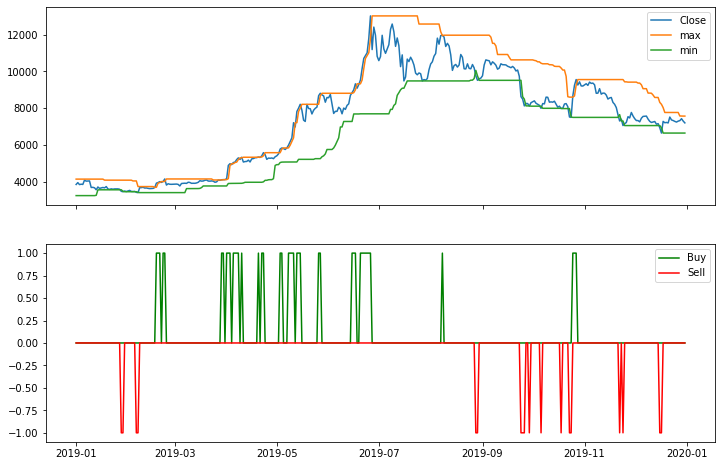

In [38]:
start = '2019'
end = '2019'
fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)
#plt.figure(figsize=(12, 8))
#plt.subplot(211)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].legend(['Close', 'max', 'min'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['Buy', 'Sell'])